In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [3]:
DATADIR = "sugar"

CATEGORIES = ["nosack","sack_only"]
# CATEGORIES =["sack2"]
#CATEGORIES = ["nosackwm","sackwm","sack"]
training_data = []
classes=[]
IMG_SIZE=200
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                #new_array=img_array
                training_data.append(new_array)  # add this to our training_data
                classes.append(class_num)
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))


In [4]:

create_training_data()


100%|██████████| 500/500 [00:01<00:00, 457.26it/s]


In [5]:
l=len(training_data)
print(len(training_data))
print(len(classes))

992
992


In [6]:
y=np.array(classes)
y.shape

(992,)

In [7]:
data= np.zeros((l,200,200), dtype=np.float32)

In [8]:
for i in range(l):
    data[i] = training_data[i]

In [9]:
data.shape

(992, 200, 200)

In [10]:
# X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.3)

In [11]:
x=data.reshape(l,40000)
#xtest=X_test.reshape(151,40000)

In [12]:
x.shape

(992, 40000)

In [13]:
# Compute a PCA 
n_components = 2
pca = PCA(n_components=n_components, whiten=True).fit(x)
 
# apply PCA transformation
X_train_pca = pca.transform(x)
#X_test_pca = pca.transform(xtest)

In [14]:
X_train_pca.shape

(992, 2)

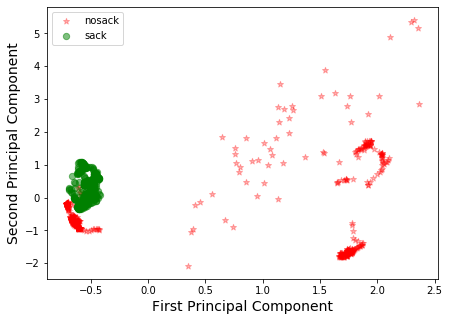

In [15]:
# visualizing pca's
x1=X_train_pca[:, 0]
x2=X_train_pca[:, 1]
labels=y

cdict={0:'red',1:'green'}
labl={0:'nosack',1:'sack'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}

fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')

for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(x1[ix],x2[ix],c=cdict[l],s=40,label=labl[l],marker=marker[l],alpha=alpha[l])
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

In [16]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_pca)
# y_kmeans = kmeans.predict(X_train_pca)
#plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

In [17]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_pca, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

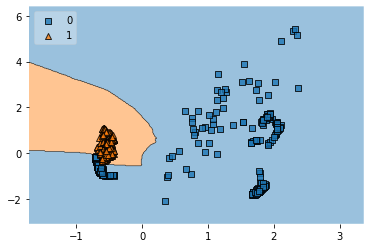

In [18]:
# Plotting decision region
plot_decision_regions(X_train_pca, y, clf=neigh, legend=2)# Adding axes annotations
plt.show()

In [19]:
# # train a neural network
# clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y)

In [3]:
import pickle

In [228]:
# Save to file in the current working directory
model_filename = "KNN_.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)
# Save to file in the current working directory
pc_filename = "PCA_sugarpcs_4.p"
with open(pc_filename, 'wb') as file:
    pickle.dump(pca, file)


    
    


In [229]:
# model_filename = "KNN_.pkl"
# pc_filename = "PCA_sugarpcs_4.p"
# # Load from file
# with open(model_filename, 'rb') as file:
#     pickle_model = pickle.load(file)
# # Load from file




In [7]:
testing_data = []
IMG_SIZE=200
path='sugar/test_sugar/'
def create_testing_data():
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append(new_array)  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                print("error reading")
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

In [8]:

create_testing_data()

print(len(testing_data))

100%|██████████| 10/10 [00:00<00:00, 40.02it/s]

10


In [6]:
# l2=len(testing_data)
# test_data= np.zeros((l2,200,200), dtype=np.float32)
# for i in range(l2):
#     test_data[i] = testing_data[i]
# testin=test_data.reshape(l2,40000)
# testin_pca = pickle_pcs.transform(testin)
# y_pred = pickle_model.predict(testin_pca)
# y_pred


l2=len(testing_data)
test_data= np.zeros((l2,200,200), dtype=np.float32)
for i in range(l2):
    test_data[i] = testing_data[i]
testin=test_data.reshape(l2,40000)
testin_pca = pickle_pcs.transform(testin)
# y_pred = pickle_model.predict(testin_pca)
# print(y_pred)
# y_value=clf.predict_proba(testin_pca)
# print(y_value)

#print(neigh.predict(testin_pca))

NameError: name 'testing_data' is not defined

In [ ]:
# img=cv2.resize(image, (200, 200))
# testin=img.reshape(1,40000)
# testin_pca = pickle_pcs.transform(testin)
# y_pred = pickle_model.predict(testin_pca)

In [235]:
testin_pca.shape

(22, 2)

In [21]:
knnPickle = open('knn1_t', 'wb') 
pickle.dump(neigh, knnPickle)  

pc_filename = "pca1_t.p"
with open(pc_filename, 'wb') as file:
    pickle.dump(pca, file)


# load the model from disk
#loaded_model = pickle.load(open('knnpickle_file', 'rb'))
#result = loaded_model.predict(X_test) 

In [237]:
result = loaded_model.predict(testin_pca) 

In [238]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

(200, 200)

In [5]:
loaded_model = pickle.load(open('knn01', 'rb'))
pc_filename = "pca01.p"
with open(pc_filename, 'rb') as file:
    pickle_pcs = pickle.load(file)




    

In [242]:
img=cv2.imread("sugar/test_sugar/0011.jpg",cv2.IMREAD_GRAYSCALE)
img_t=cv2.resize(img,(200,200))
testin=img_t.reshape(1,40000)


testin_pca = pickle_pcs.transform(testin)
result = loaded_model.predict(testin_pca) 
result

array([0])

In [9]:

l2=len(testing_data)
test_data= np.zeros((l2,200,200), dtype=np.float32)
for i in range(l2):
    test_data[i] = testing_data[i]
testin=test_data.reshape(l2,40000)


testin_pca = pickle_pcs.transform(testin)
result = loaded_model.predict(testin_pca) 
result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])